1. Общая информация
Мобильная игра зарабатывает на показе рекламы. Есть несколько форматов:
int – полноэкранная реклама; banner – горизонтальный баннер, висит внизу
экрана пока юзер играет; rv – видео, которое юзер смотрит по желанию и за
просмотр получает монетки или др. ресурсы. Информация о каждом показе
отправляется в аналитику и содержит доход от показа, формат показанной
рекламы, рекламную сеть от которой был показ и др.
eCPM – доход за 1000 показов рекламы.
2. Бизнес задача
Провести исследование показов рекламы с целью понять на сколько
отличается eCPM в зависимости от географии (города) юзера, версии ОС и
других параметров. Интересны любые инсайты и находки по eCPM-ам.
Этот csv файл содержит информацию о показах рекламы для юзеров США:
https://drive.google.com/drive/folders/1bjWlzyXV8ALcoxZYrdNQH6_MOm3nS3Pl?us
p=sharing
3. Что требуется
1. Для каждого формата рекламы:
a. построить распределение средних eCPM-ов юзеров
b. отобразить средние eCPM-ы по городам, версиям ОС
c. отобразить суммарные доходы по городам, версиям ОС
2. Учесть статистическую значимость для п.1b (отобразить, отфильтровать
незначимое или хотя бы прокомментировать). Объяснить решение.
3. Описать наблюдения и вывод по исследованию.
UPD: пункты 1b, 1с и 2 были уточнены (11:07 15.06.22). Если уже сделали,
менять не обязательно.
4. Дополнительные (по желанию)
Исследовать:
– Какой процент доходов содержит информацию о городе юзера
– Зависит ли eCPM от времени дня

5. Вспомогательная информация
Столбец profile_id – id юзера
Столбец event_json содержит данные о событии показа рекламы:
ad_type – формат рекламы (int, banner или rv)
placement – когда/где был показ рекламы в игре
view_index – номер показа конкретного формата рекламы для юзера (не
поддерживается для баннеров)
revenue – доход от конкретного показа рекламы (eCPM = revenue * 1000)
ads_ltv – накапливающийся доход от рекламы, равен сумме всех revenue
юзера
network_name – рекламная сеть, от которой был показ
Остальные столбцы должны быть интуитивно понятны
6. После выполнения
По готовности, опубликуйте Jupyter Notebook с выполненным заданием на
github и пришлите ссылку на репозиторий.
При оценке выполненного задания будет оцениваться:
– на сколько понятно визуализированы данные, хорошо ли выбраны
средства для презентации данных (типы диаграмм, таблиц или др.)
– чистота и понятность кода
– описания наблюдений в процессе исследования и сделанные выводы

Импортируем необходимые библиотеки, загрузим и просмотрим данные

In [ ]:
! gdown 1h2eXP4EyL8hYT2kZ0wmShAtp8Qz8HpNq

Downloading...
From: https://drive.google.com/uc?id=1h2eXP4EyL8hYT2kZ0wmShAtp8Qz8HpNq
To: /content/us events ad_revenue filtered 03.02-07.02.csv
100% 571M/571M [00:05<00:00, 108MB/s] 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/us events ad_revenue filtered 03.02-07.02.csv')

In [ ]:
df.head()

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,country_iso_code,city
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:45,1643994165,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 17:53:05,1644072785,2022-02-06 16:59:29,1644155969,wifi,Verizon,US,Charlotte
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""int"",""placement"":""next_level"",""vie...",2022-02-06 17:09:01,1644156541,2022-02-06 17:09:24,1644156564,wifi,T-Mobile,US,Cocoa
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN


In [ ]:
df['event_json'][0]

'{"ad_type":"banner","placement":"","view_index":1,"session_view_index":0,"cur_ticks":637795729492245130,"session_length":705.8807,"revenue":0.000510313,"ads_ltv":0.487876676518837,"ecpm_sma":0.511508107185364,"normalized_ecpm_sma":0.511508107185364,"value":0.000510313,"currency":"USD","ad_country_code":"US","network_name":"Google AdMob","ad_unit_id":"64c6b1114ea8c1cc","ad_network_placement":"ca-app-pub-7511632782617496/8825263691","creativeId":"CJ3XirfD5vUCFYPnKAUdG3MOYQ"}'

Колонка event_json представлена json-форматом, переведем содержимое данной колонки в датафрейм 

In [ ]:
import json

# создание таблицы df_json из колонки event_json
df_json = pd.json_normalize(df['event_json'].apply(json.loads))

In [ ]:
# объединим обе таблицы
df = pd.concat([df, df_json], axis=1)

In [ ]:
# удалим колонку event_json
df = df.drop(['event_json'], axis=1)

Удалим дублирующие колонки и колонки, не несущие информации

In [ ]:
df = df.drop(['event_name', 'country_iso_code', 'currency', 'ad_unit_id'], axis=1)

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df.head()

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,city,ad_type,placement,view_index,session_view_index,cur_ticks,session_length,revenue,ads_ltv,ecpm_sma,normalized_ecpm_sma,value,ad_country_code,network_name,ad_network_placement,creativeId
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,1644159499,wifi,NaN,Norwalk,banner,,1,0,637795729492245130,705.88070,0.000510,0.487877,0.511508,0.511508,0.000510,US,Google AdMob,ca-app-pub-7511632782617496/8825263691,CJ3XirfD5vUCFYPnKAUdG3MOYQ
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,2022-02-04 20:02:45,1643994165,2022-02-06 17:58:19,1644159499,wifi,NaN,Norwalk,banner,,1,0,637795729659949790,722.65120,0.000510,0.488387,0.511389,0.511389,0.000510,US,Google AdMob,ca-app-pub-7511632782617496/8825263691,CNa-lL_D5vUCFZrpKAUdU2QBDQ
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,2022-02-05 17:53:05,1644072785,2022-02-06 16:59:29,1644155969,wifi,Verizon,Charlotte,banner,,1,0,637796515863735930,431.81290,0.002386,0.678479,0.928597,0.928597,0.002386,US,APPLOVIN_EXCHANGE,banner_regular,pandora-58
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,2022-02-06 17:09:01,1644156541,2022-02-06 17:09:24,1644156564,wifi,T-Mobile,Cocoa,int,next_level,1,1,637797353426827330,125.94960,0.013894,0.013894,13.782633,13.893784,0.013894,US,AppLovin,inter_regular,13045364
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,1644156976,cell,Verizon,NaN,banner,,1,0,637797357392197840,12.71129,0.006828,0.060571,1.660282,1.660282,0.006828,US,Google AdMob,ca-app-pub-7511632782617496/6197324251,CMTi5e-h6_UCFUdVwQodt9EIMw


Период наблюдений

In [ ]:
df['event_datetime'].min(), df['event_datetime'].max()

('2022-01-29 17:42:32', '2022-02-07 23:59:59')

Пропуски в данных (%)

In [ ]:
df.isna().mean()

profile_id                 0.000016
os_version                 0.000000
device_manufacturer        0.000000
device_model               0.000000
device_type                0.000000
device_locale              0.000000
event_datetime             0.000000
event_timestamp            0.000000
event_receive_datetime     0.000000
event_receive_timestamp    0.000000
connection_type            0.000000
operator_name              0.021950
city                       0.376370
ad_type                    0.000000
placement                  0.000000
view_index                 0.000000
session_view_index         0.000000
cur_ticks                  0.000000
session_length             0.000000
revenue                    0.000000
ads_ltv                    0.000000
ecpm_sma                   0.000000
normalized_ecpm_sma        0.000000
value                      0.000000
ad_country_code            0.000000
network_name               0.000000
ad_network_placement       0.000000
creativeId                 0

Среднее значение eCPM по выборке

In [ ]:
df['revenue'].mean() * 1000

2.7797430937683245

Среднее значение eCPM, доход и количество показов по форматам

In [ ]:
t = df.groupby('ad_type')['revenue'].agg(['mean', 'sum', 'count']).reset_index()
t.columns = ['ad_type', 'eCPM', 'revenue', 'count']
t['eCPM'] = t['eCPM'] * 1000

t

,ad_type,eCPM,revenue,count
0,banner,0.744113,607.184041,815984
1,int,36.209634,1361.952967,37613
2,rv,65.051165,421.661652,6482


По таблице видно, что eCPM увеличивается обратно пропорционально числу показов, стоимость просмотра выше у более редкого формата.

Более половины дохода составляет доход от полноэкранной рекламы.

### Распределение средних значений eCPM по пользователям

Сделаем сводную таблицы eCPM по пользователям

In [ ]:
users = df.groupby('profile_id')['revenue'].agg(['mean', 'count']).reset_index()

In [ ]:
users['mean'] = users['mean'] * 1000
users.columns = ['profile_id', 'eCPM', 'count']

In [ ]:
users

,profile_id,eCPM,count
0,JL00qCZH1HV,3.183940,13
1,JL015rw9vmN,2.034417,429
2,JL01aCdFTJy,1.027932,39
3,JL04ODuw9UP,2.674502,84
4,JL06OWhBYxn,0.468146,13
...,...,...,...
4221,JMLQTj4i34Y,1.682470,37
4222,JMLY5SO7wmn,3.006910,11
4223,JMLmauy744E,23.429988,1
4224,JMLt54Rmui5,8.102624,3


Распределение eCPM по пользователям

In [ ]:
sns.set(rc={'figure.figsize':(13, 7)})

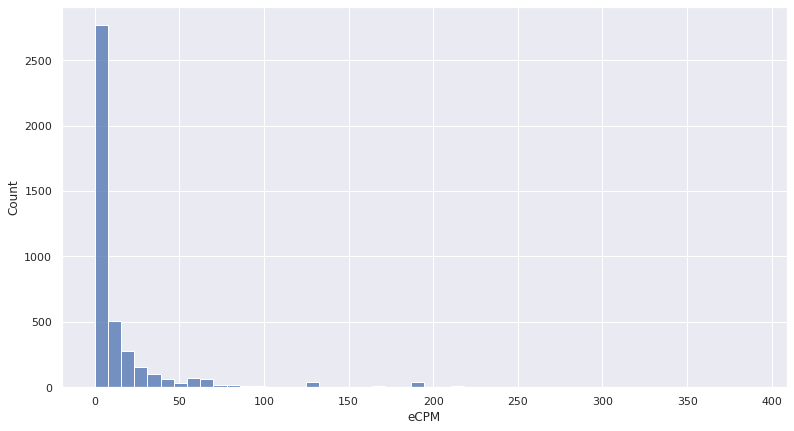

In [ ]:
sns.histplot(data=users, x='eCPM', bins=50)

In [ ]:
users['eCPM'].describe()

count    4226.000000
mean       15.788994
std        33.137012
min         0.036730
25%         1.677966
50%         3.912970
75%        13.276897
max       389.605621
Name: eCPM, dtype: float64

Большая часть значений лежит ниже 4.

Распределение имеет длиный правый хвост

Распределение количества показов

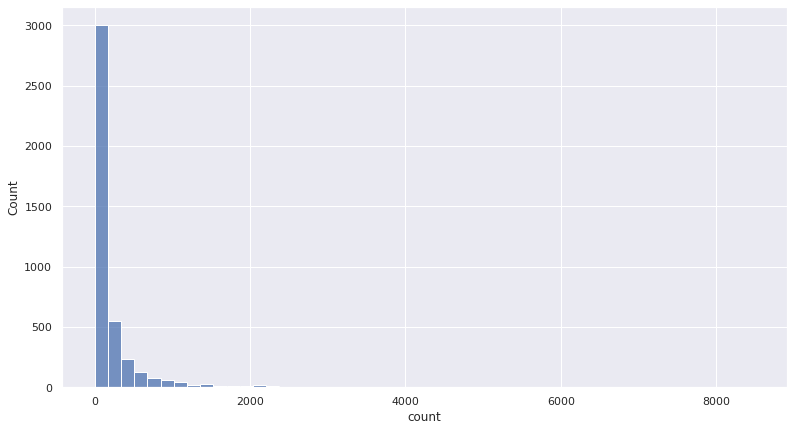

In [ ]:
sns.histplot(data=users, x='count', bins=50)

In [ ]:
users['count'].describe()

count    4226.000000
mean      203.517511
std       435.621747
min         1.000000
25%         3.000000
50%        57.000000
75%       209.000000
max      8486.000000
Name: count, dtype: float64

Распределение показов также имеет длинный правый хвост, медианное значение - 57.

Посмотрим на взаимное распределение обоих величин.

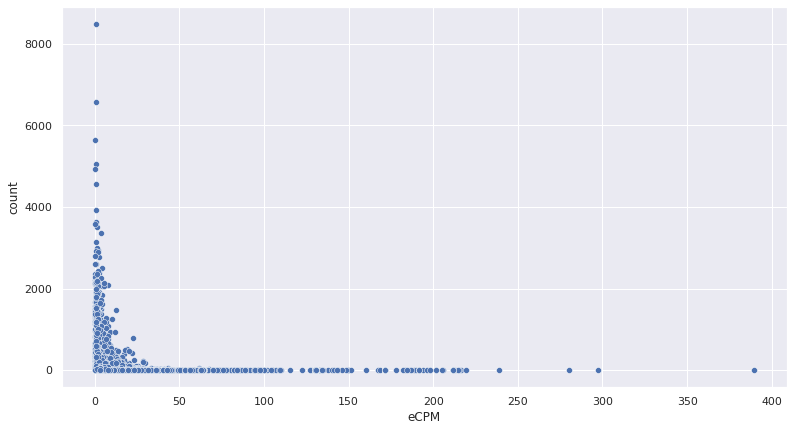

In [ ]:
sns.scatterplot(data=users, x='eCPM', y='count')

На графике видно, что наибольший размах eCPM для пользователей с небольшим числом просмотров. Точность значении eCPM таких пользователей не надежны, часто бывают выбросы, поэтому считаю, что необходимо отбросить часть пользователей с низким числом просмотров. Возможно эти пользователи сыграли пару раз и забросили приложение или только начали играть. Предположим, что если пользователь просмотрел 10 и более показов, то его значение eCPM будем считать точным. При необходимости это число можно будет изменить.

Также есть пользователи с высоким количеством просмотров, возможно это ботнеты для промотра рекламы. Поэтому можно срезать часть пользователей, возьмем только первые 95%.

In [ ]:
users_new = users[(users['count'] >= 10) & (users['count'] < users['count'].quantile(0.95))]

Распределение показов на пользователя на очищенных данных

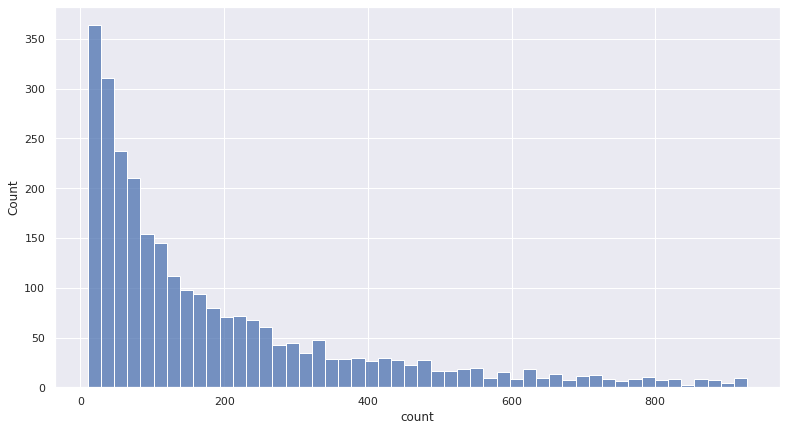

In [ ]:
sns.histplot(data=users_new, x='count', bins=50)

In [ ]:
users_new['count'].describe()

count    2709.000000
mean      186.259874
std       193.903446
min        10.000000
25%        47.000000
50%       111.000000
75%       253.000000
max       928.000000
Name: count, dtype: float64

Распределение eCPM на пользователя на очищенных данных

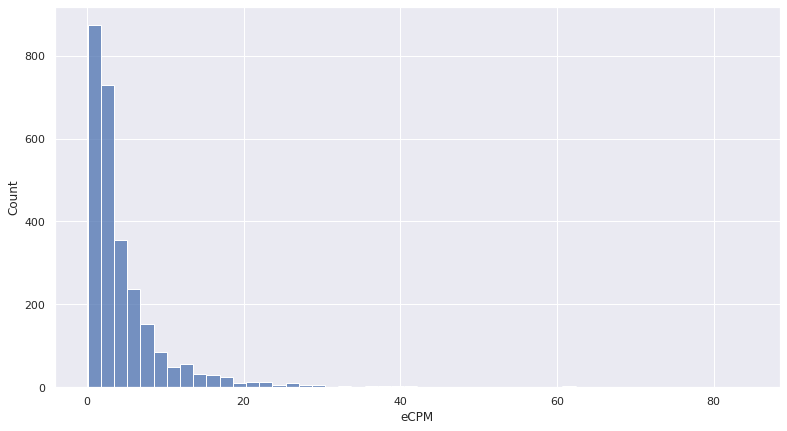

In [ ]:
sns.histplot(data=users_new, x='eCPM', bins=50)

In [ ]:
users_new['eCPM'].describe()

count    2709.000000
mean        4.689718
std         5.894478
min         0.091205
25%         1.483679
50%         2.779938
75%         5.541379
max        84.290638
Name: eCPM, dtype: float64

Распределение eCPM стало более равномерным, высоких значений eCPM стало меньше

Создадим сводную таблицу по пользователю и формату показа

In [ ]:
users_ad = df.groupby(['profile_id', 'ad_type'])['revenue'].agg(['mean', 'count']).reset_index()

Выберем только "надежных" пользователей из таблицы users_new

In [ ]:
users_ad = users_ad[users_ad['profile_id'].isin(users_new['profile_id'])]

users_ad.columns = ['profile_id', 'ad_type', 'eCPM', 'count']
users_ad['eCPM'] = users_ad['eCPM'] * 1000

users_ad

,profile_id,ad_type,eCPM,count
0,JL00qCZH1HV,banner,3.183940,13
1,JL015rw9vmN,banner,1.160748,411
2,JL015rw9vmN,int,21.983199,18
3,JL01aCdFTJy,banner,0.740097,38
4,JL01aCdFTJy,int,11.965651,1
...,...,...,...,...
8786,JMLQTj4i34Y,int,18.723556,3
8787,JMLY5SO7wmn,banner,0.306027,10
8788,JMLY5SO7wmn,int,30.015743,1
8792,JMML6MrvRA4,banner,0.419296,311


Распределение пользовательских eCPM по формату показа

In [ ]:
users_ad.groupby('ad_type')['eCPM'].agg(['mean','median', 'count']).reset_index()

,ad_type,mean,median,count
0,banner,1.063901,0.566093,2709
1,int,43.413341,27.124378,2670
2,rv,80.350038,45.497309,1023


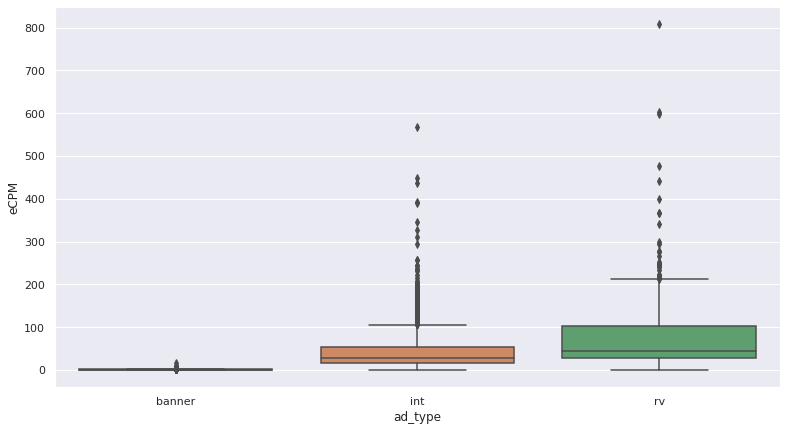

In [ ]:
sns.boxplot(data=users_ad, x='ad_type', y='eCPM')

Text(0, 0.5, 'rv')

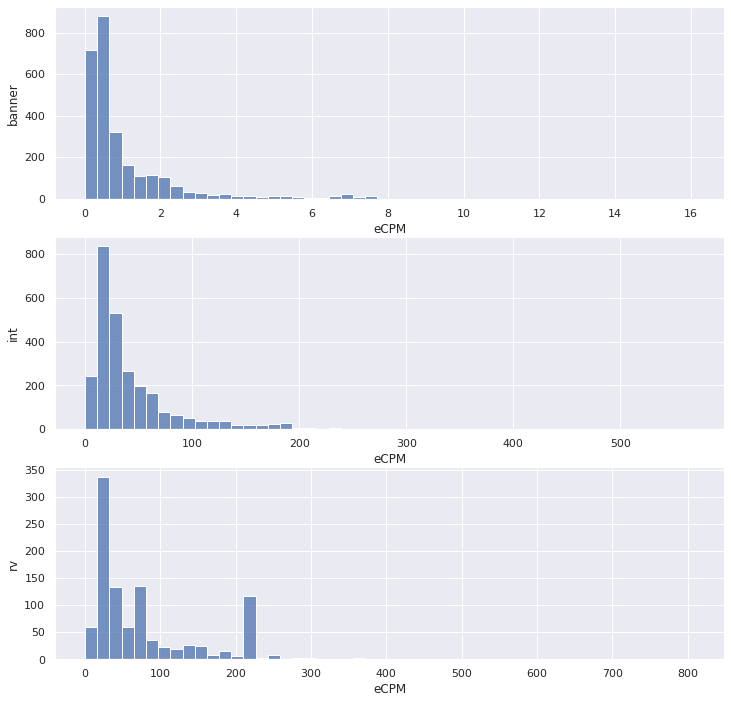

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12,12))

sns.histplot(data=users_ad[users_ad['ad_type'] == 'banner'], x='eCPM', bins=50, ax=ax[0])
ax[0].set_ylabel('banner')

sns.histplot(data=users_ad[users_ad['ad_type'] == 'int'], x='eCPM', bins=50, ax=ax[1])
ax[1].set_ylabel('int')

sns.histplot(data=users_ad[users_ad['ad_type'] == 'rv'], x='eCPM', bins=50, ax=ax[2])
ax[2].set_ylabel('rv')

Видно, что в среднем значения eCPM, а также разброс у видеорекламы выше, затем идет полноэкранная, после баннеры.

Проведем несколько t-тестов, чтобы убедиться в значемости различии.

In [ ]:
from scipy import stats

In [ ]:
# баннер vs полноэкранная
stats.ttest_ind(users_ad[users_ad['ad_type'] == 'banner']['eCPM'], 
                users_ad[users_ad['ad_type'] == 'int']['eCPM'],
                equal_var=False)

Ttest_indResult(statistic=-48.651360627049414, pvalue=0.0)

In [ ]:
# полноэкранная vs видео
stats.ttest_ind(users_ad[users_ad['ad_type'] == 'int']['eCPM'], 
                users_ad[users_ad['ad_type'] == 'rv']['eCPM'],
                equal_var=False)

Ttest_indResult(statistic=-14.193838437822226, pvalue=1.3624081051886896e-42)

In [ ]:
# баннер vs видео
stats.ttest_ind(users_ad[users_ad['ad_type'] == 'banner']['eCPM'], 
                users_ad[users_ad['ad_type'] == 'rv']['eCPM'],
                equal_var=False)

Ttest_indResult(statistic=-32.326215450959815, pvalue=1.6850452290732154e-158)

По результатам t-тестов можно сделать вывод, что пользовательский eCPM статистически значимо различается для всех трех форматов (p-value настолько мал, что множественным сравнение можно пренебречь).

### Распределение средних значений eCPM и суммарного дохода по городам

In [ ]:
df['city'].notna().mean()

0.6236299223675965

Толко 62% данных содеожит информацию по городу

Построим сводную таблицу eCPM и дохода по городам

In [ ]:
cities = df.groupby(['city'])['revenue'].agg(['mean', 'sum', 'count']).reset_index()
cities.columns = ['city', 'eCPM', 'revenue', 'count']
cities['eCPM'] = cities['eCPM'] * 1000
cities.sort_values('count', ascending=False)

,city,eCPM,revenue,count
585,New York,2.698726,47.454397,17584
540,Minneapolis,2.637542,34.235291,12980
377,Houston,3.408480,34.551763,10137
796,Springfield,1.225612,12.421576,10135
140,Charlotte,2.627792,25.620972,9750
...,...,...,...,...
816,Swedesboro,0.485389,0.000485,1
430,Kokomo,20.160000,0.020160,1
643,Palmdale,2.087812,0.002088,1
807,Suffolk,109.704651,0.109705,1


Распределение eCPM по городам

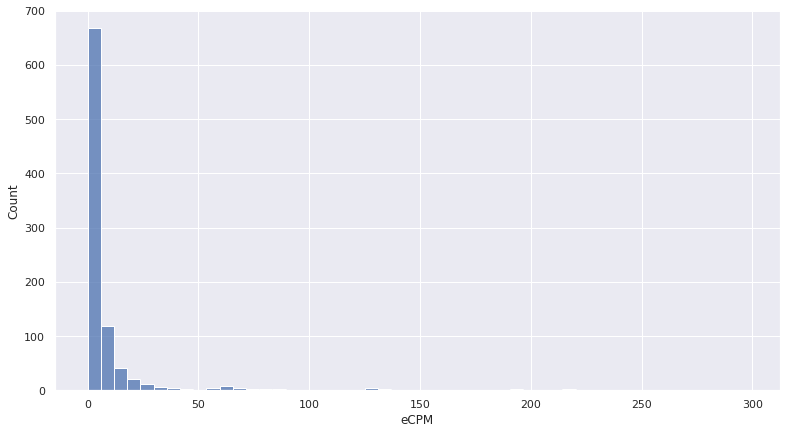

In [ ]:
sns.histplot(data=cities, x='eCPM', bins=50)

In [ ]:
cities['eCPM'].describe()

count    920.000000
mean      10.286404
std       26.984796
min        0.040858
25%        1.596430
50%        3.042810
75%        6.581200
max      297.600000
Name: eCPM, dtype: float64

Распределение eCPM и количества просмотров

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


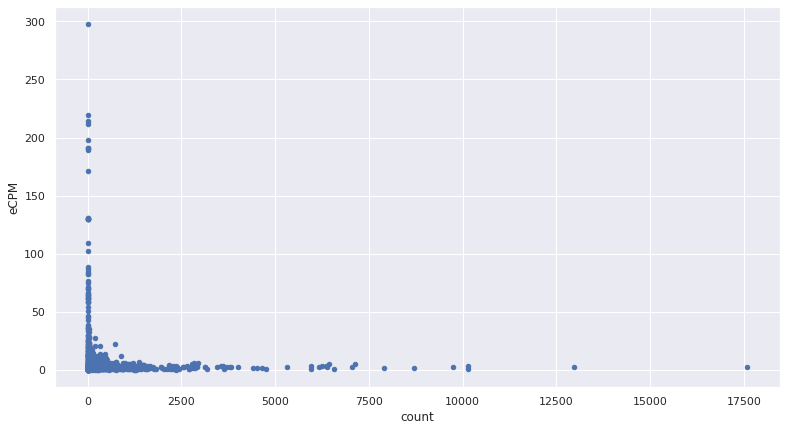

In [ ]:
cities.plot.scatter(x='count', y='eCPM')

Аналогично с таблицей users, города с небольшим количеством просмотров рекламы дают неточную оценку eCPM, поэтому часто бывают выбросы. Поступим также как и в прошлый раз - предположим, что города с 30 и более показами дают точную оценку (значение можно будет изменить).

Создадим новый датасет с "надежными" городами.

In [ ]:
cities_new = cities[cities['count'] >= 30]

Распределение eCPM по городам на новых данных

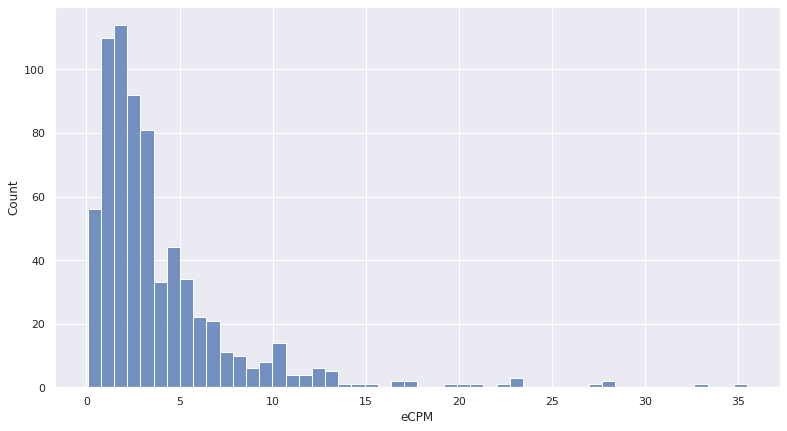

In [ ]:
sns.histplot(data=cities_new, x='eCPM', bins=50)

In [ ]:
cities_new['eCPM'].describe()

count    694.000000
mean       3.954903
std        4.175559
min        0.069294
25%        1.537939
50%        2.724291
75%        4.808134
max       35.465328
Name: eCPM, dtype: float64

Топ-10 городов по eCPM

In [ ]:
cities_new.sort_values('eCPM', ascending=False).head(10)

,city,eCPM,revenue,count
217,Dobson,35.465328,1.099425,31
491,Madisonville,33.139781,1.358731,41
636,Oxnard,28.192863,0.873979,31
93,Bremerton,27.975743,1.314860,47
228,East Peoria,27.504927,5.528490,201
809,Sulphur,23.428716,0.773148,33
879,Wausau,23.079158,1.061641,46
721,Rocky Mount,22.774077,16.693398,733
663,Pinellas Park,22.489327,0.742148,33
760,Santa Rosa,20.817219,6.661510,320


Антитоп-10 городов по eCPM

In [ ]:
cities_new.sort_values('eCPM').head(10)

,city,eCPM,revenue,count
114,Camden,0.069294,0.004158,60
464,Lewes,0.174279,0.049147,282
471,Lincoln City,0.197237,0.021104,107
587,Newington,0.210398,0.122031,580
308,Georgetown,0.215718,0.264686,1227
861,Vista,0.244441,0.314595,1287
529,Metairie,0.292391,0.070466,241
757,Santa Cruz,0.296372,0.376095,1269
492,Malden,0.297075,0.702879,2366
427,Kingwood,0.320540,0.246175,768


Распределение доходов по городам на новых данных

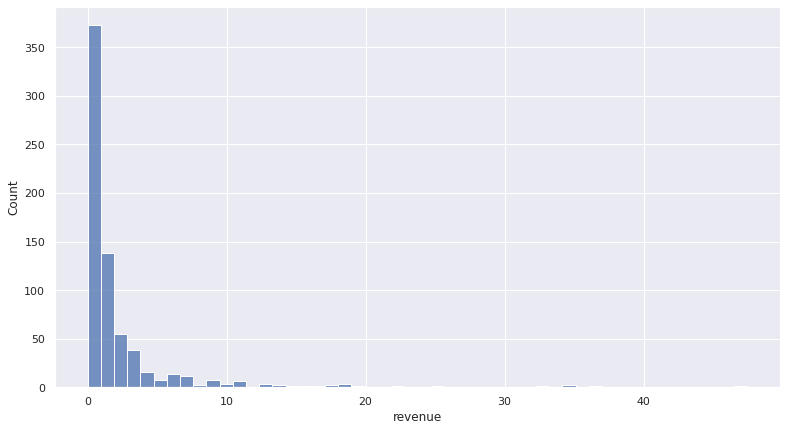

In [ ]:
sns.histplot(data=cities_new, x='revenue', bins=50)

In [ ]:
cities_new['revenue'].describe()

count    694.000000
mean       2.156904
std        4.340287
min        0.004158
25%        0.317856
50%        0.837518
75%        2.017460
max       47.454397
Name: revenue, dtype: float64

Топ-10 городов по доходам

In [ ]:
cities_new.sort_values('revenue', ascending=False).head(10)

,city,eCPM,revenue,count
585,New York,2.698726,47.454397,17584
388,Indianapolis,5.147280,36.679515,7126
377,Houston,3.408480,34.551763,10137
540,Minneapolis,2.637542,34.235291,12980
161,Cleveland,5.037303,32.475495,6447
140,Charlotte,2.627792,25.620972,9750
172,Columbus,3.551669,22.158861,6239
483,Los Angeles,3.099929,19.740347,6368
792,Spokane,3.171435,18.923951,5967
197,Dallas,3.034538,18.747376,6178


Создадим новую сводную таблицу по городам и формату показов.

Выберем только те города, которые есть в таблице cities_new

In [ ]:
cities_ad = df.groupby(['city', 'ad_type'])['revenue'].agg(['mean', 'sum','count']).reset_index()

cities_ad.columns = ['city', 'ad_type', 'eCPM', 'revenue', 'count']
cities_ad = cities_ad[cities_ad['city'].isin(cities_new['city'])]
cities_ad['eCPM'] = cities_ad['eCPM'] * 1000

cities_ad

,city,ad_type,eCPM,revenue,count
0,Aberdeen,banner,0.321518,0.030866,96
1,Aberdeen,int,13.583285,0.081500,6
2,Aberdeen,rv,21.516378,0.021516,1
3,Abilene,banner,0.941283,0.043299,46
4,Abilene,int,50.301282,0.402410,8
...,...,...,...,...,...
2174,Yuma,banner,0.163029,0.018585,114
2175,Yuma,int,13.281538,0.053126,4
2176,Zanesville,banner,0.150360,0.167651,1115
2177,Zanesville,int,19.668018,1.081741,55


Распределение городских eCMP по формату показов

In [ ]:
cities_ad.groupby('ad_type')['eCPM'].agg(['mean','median', 'count'])

,mean,median,count
ad_type,,,
banner,0.927916,0.558833,694
int,42.455645,30.423341,690
rv,80.670181,55.817763,425


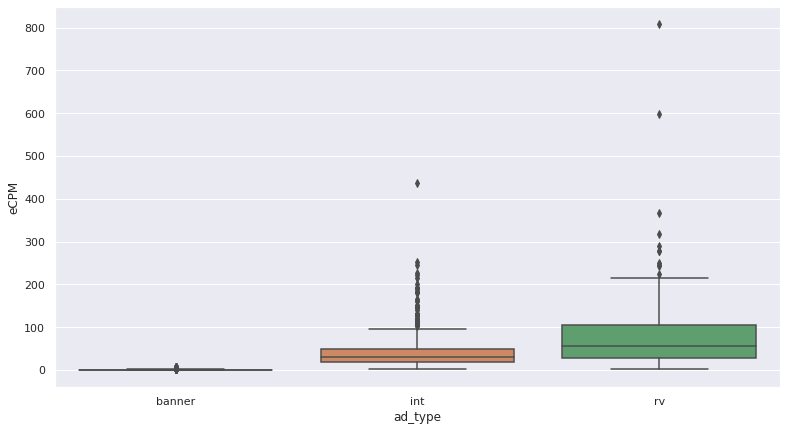

In [ ]:
sns.boxplot(data=cities_ad, x='ad_type', y='eCPM')

Text(0, 0.5, 'rv')

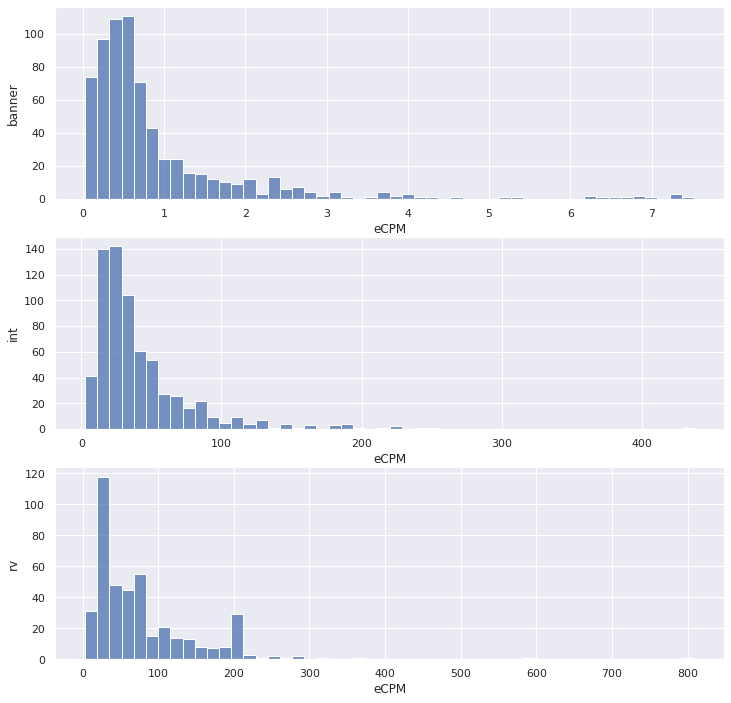

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12,12))

sns.histplot(data=cities_ad[cities_ad['ad_type'] == 'banner'], x='eCPM', bins=50, ax=ax[0])
ax[0].set_ylabel('banner')

sns.histplot(data=cities_ad[cities_ad['ad_type'] == 'int'], x='eCPM', bins=50, ax=ax[1])
ax[1].set_ylabel('int')

sns.histplot(data=cities_ad[cities_ad['ad_type'] == 'rv'], x='eCPM', bins=50, ax=ax[2])
ax[2].set_ylabel('rv')

В среднем eCPM по городам для баннеров самая низкая, около 1, самая высокая у видео - 81, у полноэкранной в два раза ниже - 42.

Распределение суммарного дохода городов по формату показов

In [ ]:
cities_ad.groupby('ad_type')['revenue'].agg(['mean','sum', 'count']).reset_index()

,ad_type,mean,sum,count
0,banner,0.533809,370.463665,694
1,int,1.223166,843.984617,690
2,rv,0.664571,282.442756,425


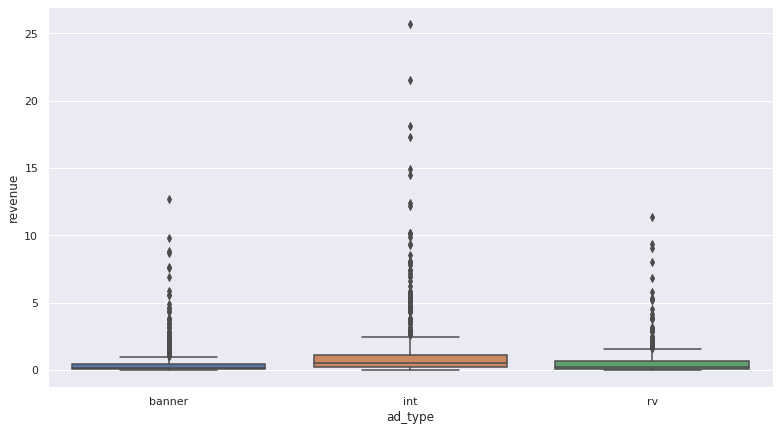

In [ ]:
sns.boxplot(data=cities_ad, x='ad_type', y='revenue')

Text(0, 0.5, 'rv')

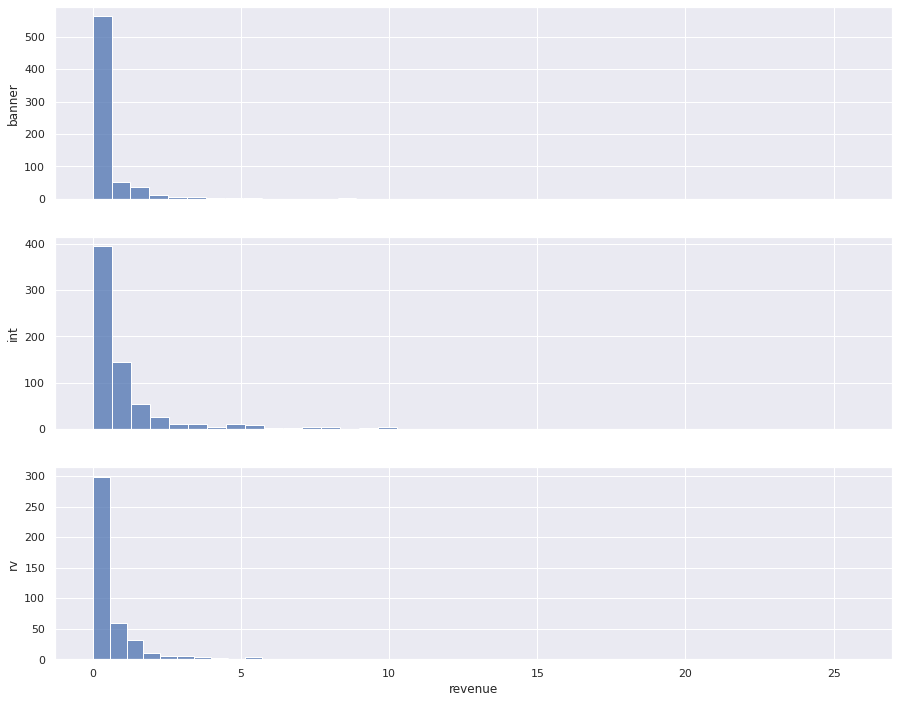

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15,12), sharex=True)

sns.histplot(data=cities_ad[cities_ad['ad_type'] == 'banner'], x='revenue', bins=20, ax=ax[0])
ax[0].set_ylabel('banner')

sns.histplot(data=cities_ad[cities_ad['ad_type'] == 'int'], x='revenue', bins=40, ax=ax[1])
ax[1].set_ylabel('int')

sns.histplot(data=cities_ad[cities_ad['ad_type'] == 'rv'], x='revenue', bins=20, ax=ax[2])
ax[2].set_ylabel('rv')

В отличии от eCPM доходы имееют примерно одинаковый масштаб, лидером по доходу является полноэкранная реклама - 844, следующая - баннеры - 370, последнии - видео - 282

### Распределение средних значений eCPM и суммарного дохода по версиям ОС

Посмотрим какие версии ОС есть в датасете

In [ ]:
df['os_version'].value_counts(dropna=False)

12       407587
11       209071
10       150871
9         66662
8.1.0      9249
8.0.0      8016
7.0        4057
7.1.2      1811
7.1.1      1342
5.0.2       709
6.0.1       704
Name: os_version, dtype: int64

Создадим сводную таблицу по версиям ОС

In [ ]:
version = df.groupby('os_version')['revenue'].agg(['mean', 'sum', 'count']).reset_index()
version.columns = ['os_version', 'eCPM', 'revenue', 'count']
version['eCPM'] = version['eCPM'] * 1000

Отсортируем таблицу по номеру версии. Для этого переведем строку номера в версии в целочисленному значению

In [ ]:
# функция преобразования версии ОС к числу 
def vers_to_int(x):
    if x.count('.') == 0:
        x += '.0.0'
    elif x.count('.') == 1:
        x += '.0'  
    return int(''.join(x.split('.')))

In [ ]:
# применим функцию vers_to_int к колонке os_version
version['int_vers'] = version['os_version'].apply(vers_to_int) 

# отсортируем таблицу и удалим ненужную колонку
version = version.sort_values('int_vers').reset_index()
version = version.drop(['int_vers', 'index'], axis=1)

In [ ]:
version

,os_version,eCPM,revenue,count
0,5.0.2,0.696093,0.493530,709
1,6.0.1,1.112602,0.783272,704
2,7.0,2.699284,10.950994,4057
3,7.1.1,1.210562,1.624575,1342
4,7.1.2,0.601710,1.089698,1811
5,8.0.0,1.483535,11.892016,8016
6,8.1.0,1.058170,9.787017,9249
7,9,1.996728,133.105867,66662
8,10,2.175819,328.267931,150871
9,11,2.808734,587.224814,209071


Распределение eCPM по версиям ОС

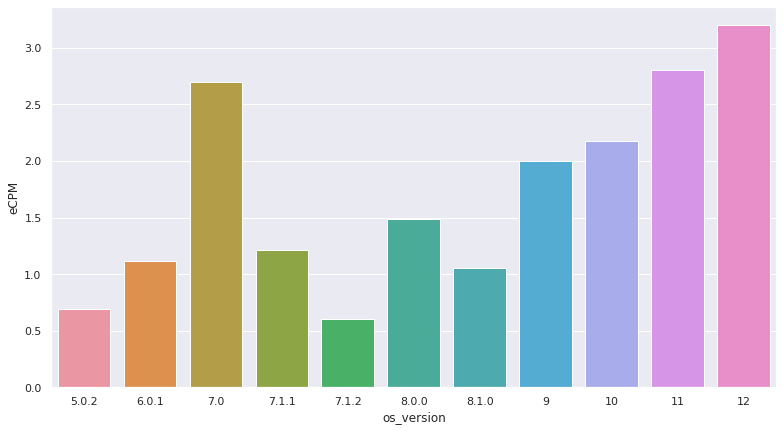

In [ ]:
sns.barplot(data=version, x='os_version', y='eCPM')

Заметен общий тренд увелечения eCPM от старых версии к новым. Исключением является 7-ая версия андроида, которая имеет сравнительно высокое значение eCPM.

Также выбиваются из тренда минорные обновления 7.1.2 и 8.1.0, значения которых ниже предыдущих.

Распределение дохода по версиям ОС

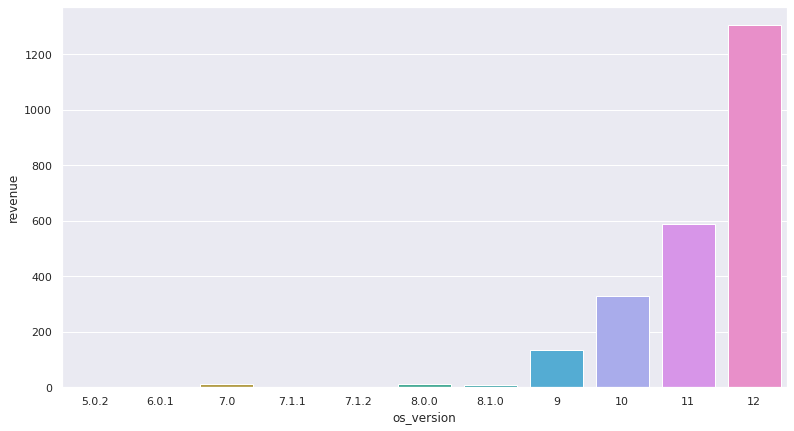

In [ ]:
sns.barplot(data=version, x='os_version', y='revenue')

Уровень дохода растет от старых версий к новым, что просто связанно с большим количеством новых версий ОС.

Создадим сводную таблицу по версии ОС и формату показа

In [ ]:
version_ad = df.groupby(['os_version', 'ad_type'])['revenue'].agg(['mean', 'sum', 'count']).reset_index()
version_ad.columns = ['os_version', 'ad_type', 'eCPM', 'revenue', 'count']
version_ad['eCPM'] = version_ad['eCPM'] * 1000

Таким же образом отсортируем таблицу по версии

In [ ]:
version_ad['int_vers'] = version_ad['os_version'].apply(vers_to_int)
version_ad = version_ad.sort_values(['ad_type', 'int_vers']).reset_index()
version_ad = version_ad.drop(['int_vers', 'index'], axis=1)

In [ ]:
version_ad

,os_version,ad_type,eCPM,revenue,count
0,5.0.2,banner,0.198288,0.135827,685
1,6.0.1,banner,0.254481,0.166939,656
2,7.0,banner,0.278132,1.065803,3832
3,7.1.1,banner,0.236141,0.300135,1271
4,7.1.2,banner,0.144868,0.252216,1741
5,8.0.0,banner,0.368201,2.804952,7618
6,8.1.0,banner,0.320697,2.847789,8880
7,9,banner,0.549553,34.820249,63361
8,10,banner,0.591274,85.002788,143762
9,11,banner,0.592766,116.298348,196196


Распределение eCPM версий ОС по формату показа

Text(0, 0.5, 'rv')

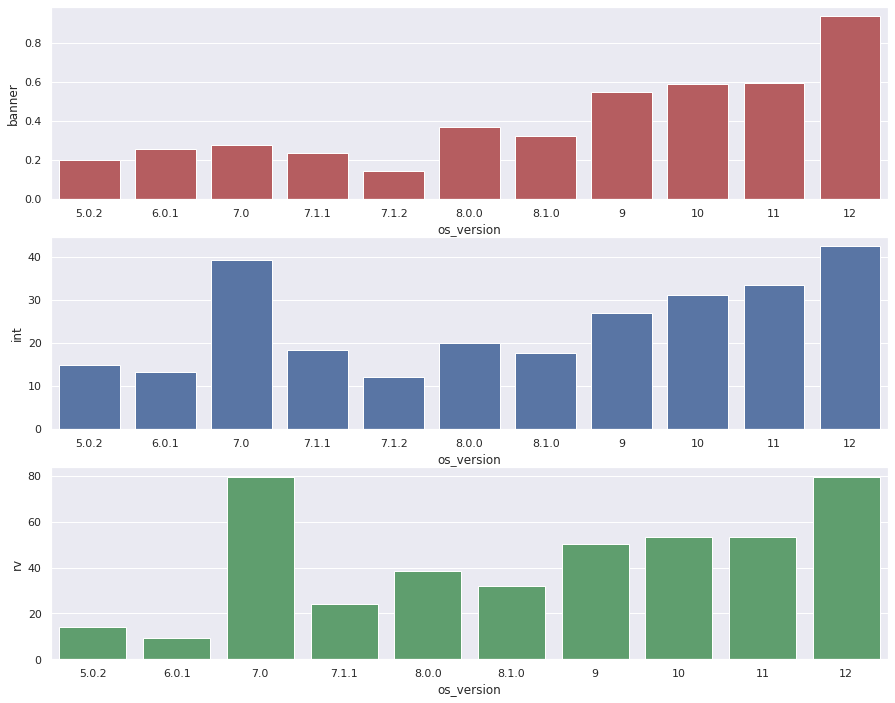

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15,12))

sns.barplot(data=version_ad[version_ad['ad_type']=='banner'], x='os_version', y='eCPM', ax=ax[0], color='r')
ax[0].set_ylabel('banner')

sns.barplot(data=version_ad[version_ad['ad_type']=='int'], x='os_version', y='eCPM', ax=ax[1], color='b')
ax[1].set_ylabel('int')

sns.barplot(data=version_ad[version_ad['ad_type']=='rv'], x='os_version', y='eCPM', ax=ax[2], color='g')
ax[2].set_ylabel('rv')

Для каждого формата характерен восходящий тренд, также заметно небольшое снижение для минорных версий 7.1.2 и 8.1.0.

Для полноэкранной рекламы и видео 7 версия имеет высокие значения eCPM, сравнимые с последней версией.

Распределение дохода по версиям и форматам

Text(0, 0.5, 'rv')

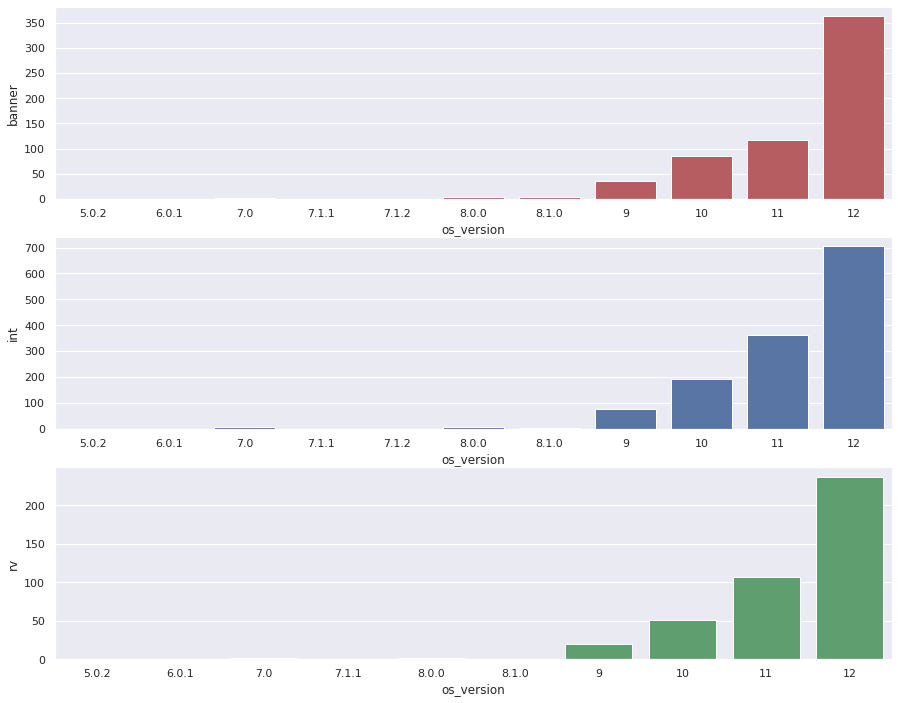

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15,12))

sns.barplot(data=version_ad[version_ad['ad_type']=='banner'], x='os_version', y='revenue', ax=ax[0], color='r')
ax[0].set_ylabel('banner')

sns.barplot(data=version_ad[version_ad['ad_type']=='int'], x='os_version', y='revenue', ax=ax[1], color='b')
ax[1].set_ylabel('int')

sns.barplot(data=version_ad[version_ad['ad_type']=='rv'], x='os_version', y='revenue', ax=ax[2], color='g')
ax[2].set_ylabel('rv')

Доход увеличивается с увеличением распространнености версии

### Процент доходов, содержащий информацию о городе пользователя

Отношение суммы доходов наблюдений, где значение в графе city не NA к сумме всех доходов

In [ ]:
df[df['city'].notna()]['revenue'].sum() / df['revenue'].sum() * 100

63.575098236945436

63.58%

### Зависимость eCPM от времени дня

Экстрагируем время дня из даты

In [ ]:
df['hour'] = pd.to_datetime(df['event_datetime'], format='%Y-%m-%d %H:%M:%S').dt.hour

Создадим сводную таблицу по времени дня

In [ ]:
hours = df.groupby('hour')['revenue'].agg(['mean', 'count']).reset_index()
hours.columns = ['hour', 'eCPM', 'count']
hours['eCPM'] = hours['eCPM'] * 1000
hours

,hour,eCPM,count
0,0,2.675560,43993
1,1,2.758656,46412
2,2,2.708332,48694
3,3,2.718954,55162
4,4,2.648077,58064
5,5,2.942329,61690
6,6,2.930231,56951
7,7,2.675508,53810
8,8,3.048182,38959
9,9,3.173506,29465


Зависимость eCPM от времени дня

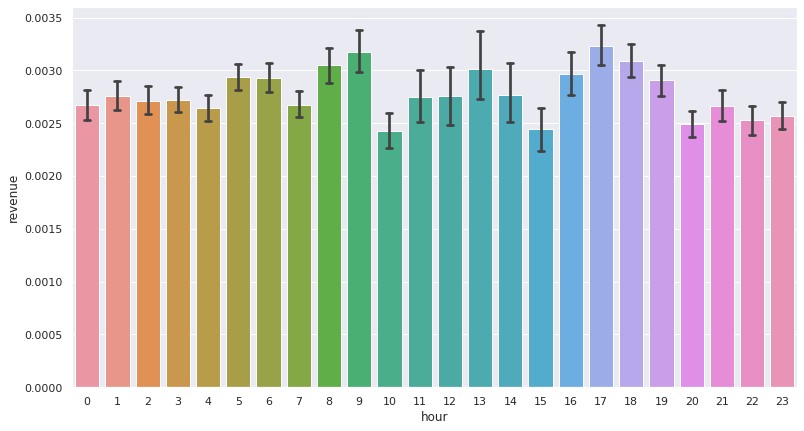

In [ ]:
sns.barplot(x="hour", y="revenue", data=df, estimator=np.mean, capsize=.2)

Зависимость дохода от времени дня

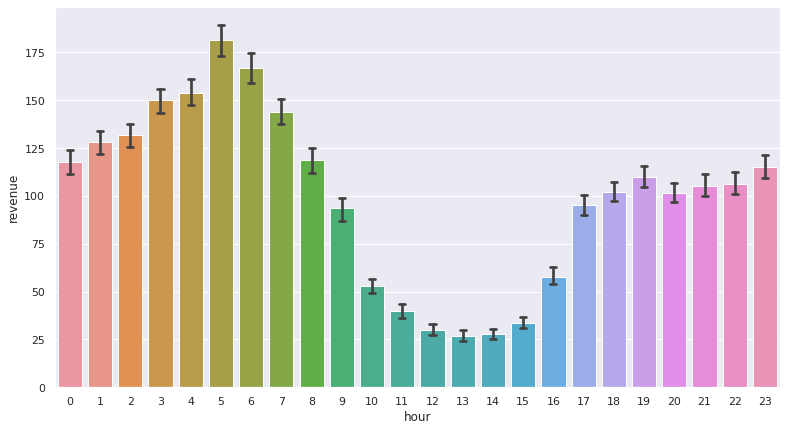

In [ ]:
sns.barplot(x="hour", y="revenue", data=df, estimator=np.sum, capsize=.2)

Зависимость показов от времени дня

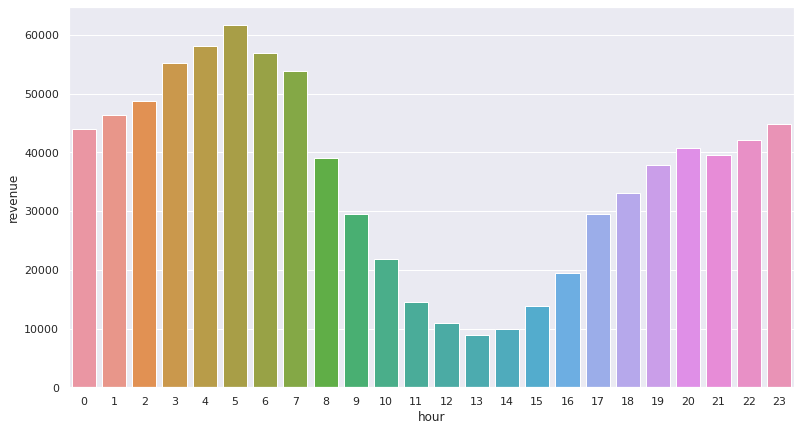

In [ ]:
sns.barplot(x="hour", y="revenue", data=df, estimator=len)

На графике видно, что eCPM слабо зависит от времени дня.

Доход и количество показов, наоборот, имеет дневной цикл.

Также заметно, что время в датасете смещенно относительно реального времени.

### Зависимость eCPM от номера показа и номера сессии показа

Номера показов и номера сессий есть только для полноэкранной и видео рекламы

In [ ]:
view_index = df.groupby(['view_index', 'ad_type'])['revenue'].agg(['mean', 'count']).reset_index()
view_index.columns = ['view_index', 'ad_type', 'eCPM', 'count']
view_index['eCPM'] = view_index['eCPM'] * 1000

view_index

,view_index,ad_type,eCPM,count
0,1,banner,0.744113,815984
1,1,int,54.696931,3755
2,1,rv,88.630520,1233
3,2,int,50.816001,2857
4,2,rv,84.675208,740
...,...,...,...,...
606,413,int,23.706346,1
607,414,int,23.706346,1
608,415,int,23.706346,1
609,416,int,23.706346,1


Зависимость eCPM от номера показа для полноэкранной рекламы

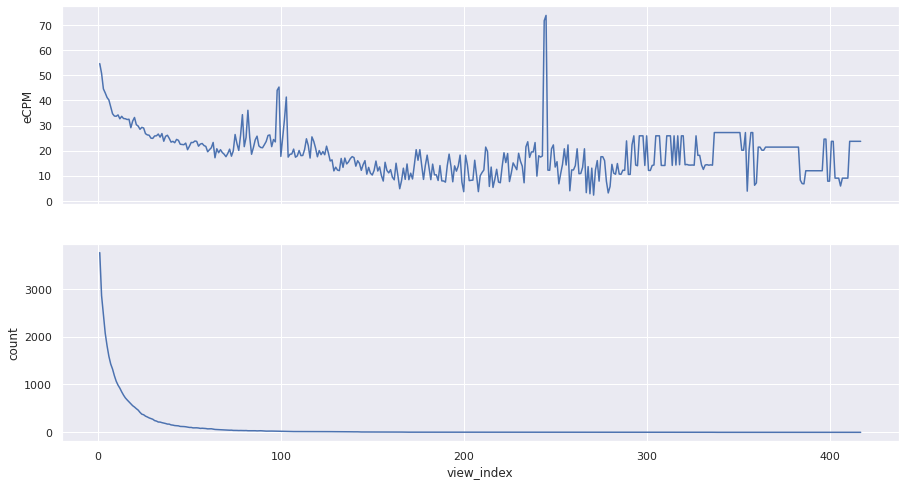

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,8), sharex=True)

sns.lineplot(data=view_index[view_index['ad_type']=='int'], x='view_index', y='eCPM', ax=ax[0])
sns.lineplot(data=view_index[view_index['ad_type']=='int'], x='view_index', y='count', ax=ax[1])

Зависимость eCPM от номера показа для видео рекламы

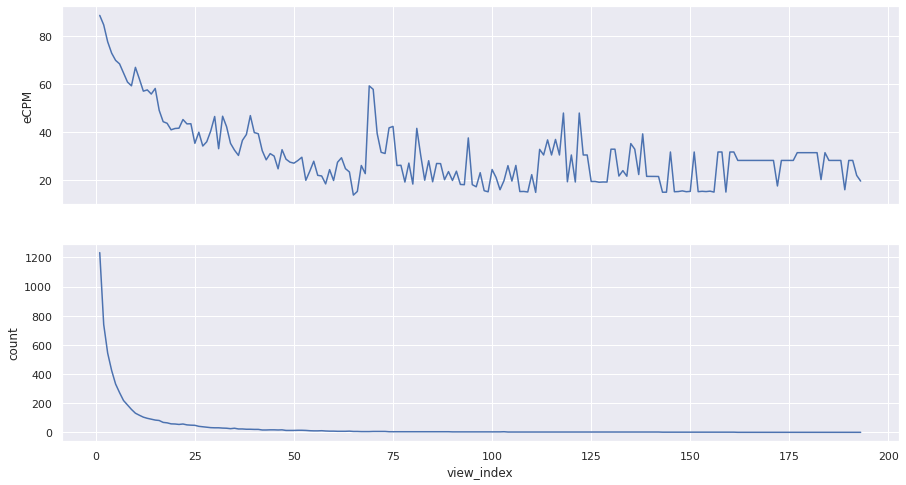

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,8), sharex=True)

sns.lineplot(data=view_index[view_index['ad_type']=='rv'], x='view_index', y='eCPM', ax=ax[0])
sns.lineplot(data=view_index[view_index['ad_type']=='rv'], x='view_index', y='count', ax=ax[1])

Виден тренд, что самый высокий eCPM у первых показов, затем значения eCPM снижаются и остаются на определенном уровне.

Для малых значений числа показов, eCPM имеет сильные флуктуации

Построим сводную таблицу для номера сессии 

In [ ]:
session_view_index = df.groupby(['session_view_index', 'ad_type'])['revenue'].agg(['mean', 'count']).reset_index()

session_view_index.columns = ['session_view_index', 'ad_type', 'eCPM', 'count']
session_view_index['eCPM'] = session_view_index['eCPM'] * 1000

session_view_index

,session_view_index,ad_type,eCPM,count
0,0,banner,0.744113,815984
1,1,int,41.010982,10898
2,1,rv,75.667016,2659
3,2,int,40.412955,6797
4,2,rv,73.651554,1240
...,...,...,...,...
128,70,int,2.492381,1
129,71,int,1.814203,1
130,72,int,2.257461,1
131,73,int,1.121363,1


Зависимость eCPM от номера сессии для полноэкранной рекламы

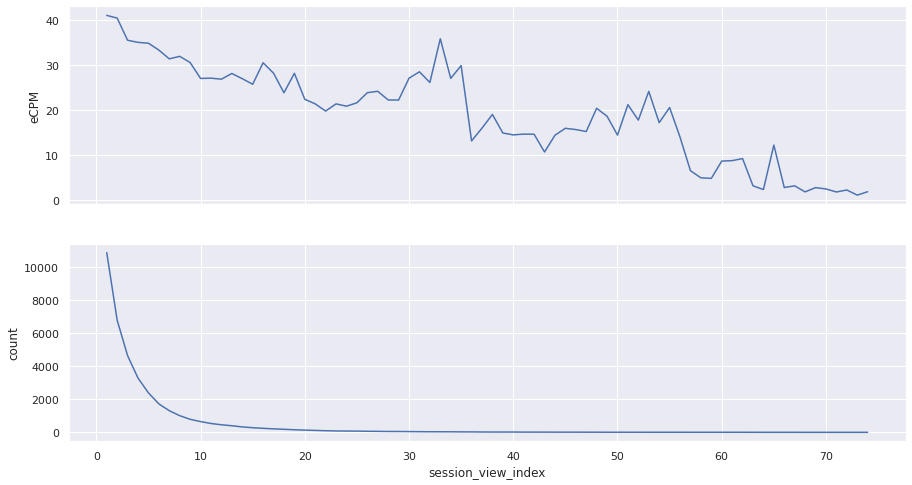

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,8), sharex=True)

sns.lineplot(data=session_view_index[session_view_index['ad_type']=='int'], x='session_view_index', y='eCPM', ax=ax[0])
sns.lineplot(data=session_view_index[session_view_index['ad_type']=='int'], x='session_view_index', y='count', ax=ax[1])

Зависимость eCPM от номера сессии для видео рекламы

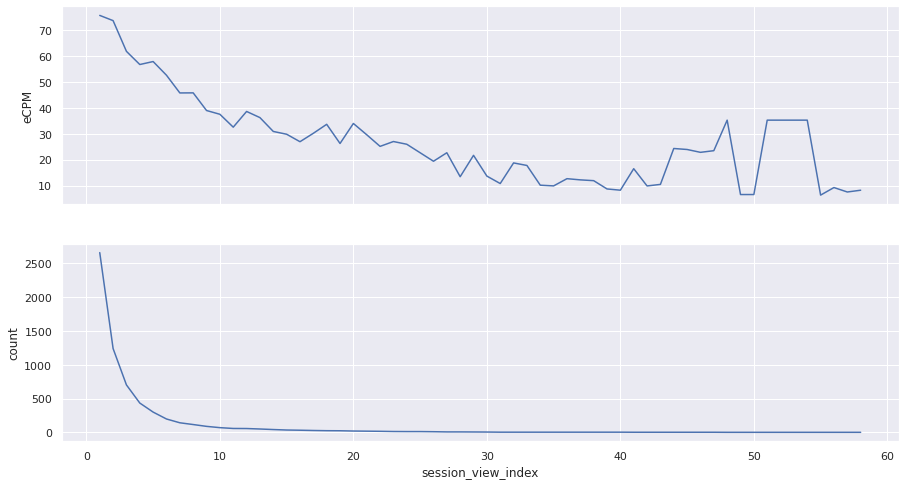

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,8), sharex=True)

sns.lineplot(data=session_view_index[session_view_index['ad_type']=='rv'], x='session_view_index', y='eCPM', ax=ax[0])
sns.lineplot(data=session_view_index[session_view_index['ad_type']=='rv'], x='session_view_index', y='count', ax=ax[1])

На графиках видно, что с ростом сессий умеьшается значение eCPM

### Влияние рекламной сети на eCPM

In [ ]:
df.groupby(['ad_network_placement', 'ad_type', 'network_name'])['revenue'].agg(['mean', 'count']) \
            .reset_index().sort_values(['ad_type', 'mean'], ascending=[True, False])

,ad_network_placement,ad_type,network_name,mean,count
13,ca-app-pub-7511632782617496/6197324251,banner,Google AdMob,0.006981,30751
11,ca-app-pub-7511632782617496/4884242584,banner,Google AdMob,0.001967,86182
19,ca-app-pub-7511632782617496/8342047967,banner,Google AdMob,0.001467,3
2,524377382067272_528134061691604,banner,Facebook,0.000716,11152
21,ca-app-pub-7511632782617496/8825263691,banner,Google AdMob,0.000497,354497
3,banner_regular,banner,APPLOVIN_EXCHANGE,0.000116,333365
5,ca-app-pub-7511632782617496/1329917050,banner,Google AdMob,0.000087,34
23,ca-app-pub-7511632782617496/9765475119,int,Google AdMob,0.183301,973
16,ca-app-pub-7511632782617496/6833525175,int,Google AdMob,0.130170,714
20,ca-app-pub-7511632782617496/8484360640,int,Google AdMob,0.061721,1792


Рекламная сеть от Google включает несколько размещений с широким разбросом значений eCPM, имеет как и самые высокие значения так и самыее низкие. AppLovin, APPLOVIN_EXCHANGE, Facebook занимает средние места.

### Влияние игровых событий на eCPM

In [ ]:
df.groupby(['placement', 'ad_type'])['revenue'].agg(['mean', 'count']).reset_index().sort_values(['ad_type', 'mean'])

,placement,ad_type,mean,count
0,,banner,0.000744,815984
8,replay,int,0.033720,5592
7,next_level,int,0.036107,30579
2,double_coins_int,int,0.040998,497
6,lose_offer_attempt_int,int,0.051006,829
4,game_repeating_reward_int,int,0.057048,116
1,double_coins,rv,0.053433,1716
5,lose_offer_attempt,rv,0.068417,4183
3,game_repeating_reward,rv,0.075095,583


### Зависимость eCPM от длины сессии

При помощи qcut разделим данные на 10 равночисленных групп по признаку длины сессий

In [ ]:
df['session_length_qcut']=pd.qcut(df['session_length'], 10)

Создадим сводную таблицу по этим группам

In [ ]:
df.groupby(['session_length_qcut'])['revenue'].agg(['mean', 'median', 'count']).reset_index()

,session_length_qcut,mean,median,count
0,"(2.2070000000000003, 173.555]",0.004272,0.000515,86008
1,"(173.555, 389.083]",0.004047,0.000497,86008
2,"(389.083, 648.001]",0.003693,0.000497,86008
3,"(648.001, 969.693]",0.003085,0.000497,86008
4,"(969.693, 1398.315]",0.002672,0.000494,86009
5,"(1398.315, 2038.337]",0.002457,0.000494,86007
6,"(2038.337, 3137.482]",0.002214,0.000438,86007
7,"(3137.482, 5609.996]",0.001990,0.000438,86008
8,"(5609.996, 13225.588]",0.001735,0.000432,86008
9,"(13225.588, 394117.6]",0.001633,0.000432,86008


Влияние длины сессий на eCPM 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

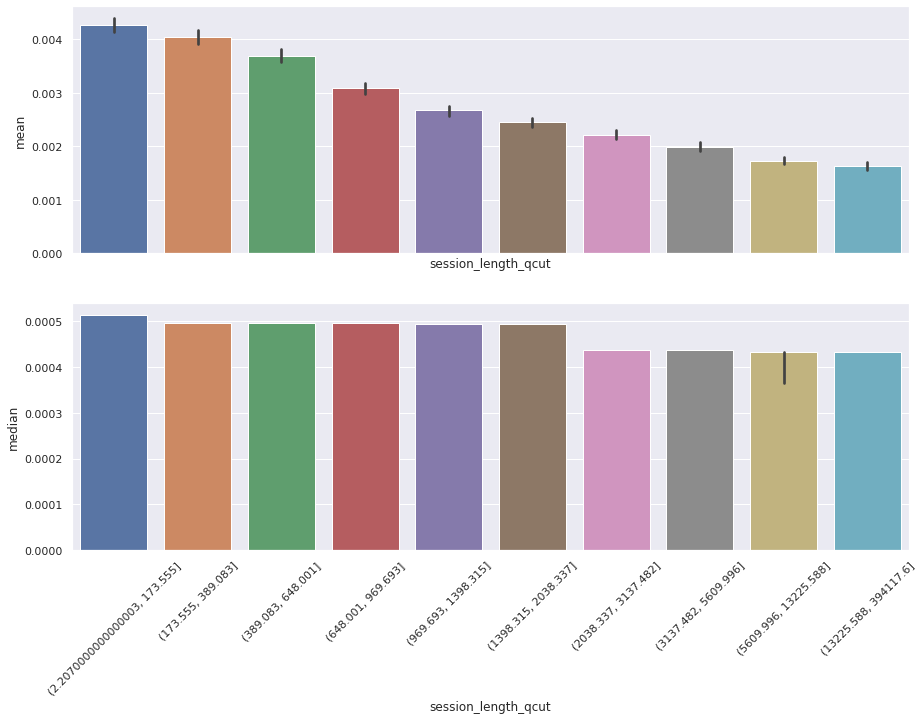

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,10), sharex=True)

sns.barplot(x="session_length_qcut", y="revenue", data=df, estimator=np.mean, ax=ax[0])
ax[0].set_ylabel('mean')
sns.barplot(x="session_length_qcut", y="revenue", data=df, estimator=np.median, ax=ax[1])
ax[1].set_ylabel('median')
plt.xticks(rotation=45)

С увелечение длины сессий в среднем eCPM падает.